#### AIM

##### This is a small yet useful kernel for providing an introduction to Artificial Neural Networks for people who want to begin their journey into the field of deep learning. For this, I have used Keras which is a high-level Neural Networks API built on top of low level neural networks APIs like Tensorflow and Theano. As it is high-level, many things are already taken care of therefore it is easy to work with and a great tool to start with.

#### What is Deep learning?


###### Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers. Deep learning is getting lots of attention lately and for good reason. It’s achieving results that were not possible before.

## What are artificial neural networks?

###### An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.

In [64]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Import data
data=pd.read_csv("C:/Users/guren/Desktop/data.csv")

In [66]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
# check columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [68]:
# delete column
del data['Unnamed: 32']

In [69]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [70]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [72]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [73]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [74]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [75]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

In [76]:
labes=LabelEncoder()

In [77]:
y=labes.fit_transform(y)

In [78]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [79]:
## splitting dataset training and testing data
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc=StandardScaler()

In [83]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [84]:
X_train

array([[ 3.12133214,  1.30675224,  3.24850994, ...,  2.58371877,
        -0.87253269,  1.1393512 ],
       [-0.19557389,  0.3548199 , -0.15891666, ...,  1.66351883,
        -0.15859547,  1.24813086],
       [-0.81431531, -1.45594625, -0.82195021, ..., -0.42619631,
        -0.275479  , -0.21386783],
       ...,
       [ 0.03327567, -0.57616527, -0.08100919, ..., -1.24470585,
        -0.70984345, -1.24836245],
       [-0.05430873,  0.07552435, -0.04738597, ...,  1.01227716,
         0.42898118,  1.16110713],
       [-0.56286332,  0.28499602, -0.6173406 , ..., -0.62549742,
        -0.33707977, -0.83608752]])

In [85]:
X_test

array([[-0.48092952, -0.16187686, -0.45865539, ..., -0.2146561 ,
         0.1683625 ,  0.18209015],
       [ 1.34704169,  0.46886559,  1.28442168, ...,  0.9548591 ,
        -0.56294929, -0.99327413],
       [ 0.36383615,  0.04293987,  0.38643561, ...,  0.53933368,
        -0.11121026, -0.21549953],
       ...,
       [-0.64197181, -1.08122472, -0.5808471 , ..., -0.83537553,
        -0.28495604,  1.05776645],
       [-0.28315829, -0.25032046, -0.32785285, ..., -0.16932605,
        -1.06207354, -0.81052429],
       [-1.10814685, -0.72512289, -1.05608265, ..., -0.27600276,
        -0.47291739,  0.69988135]])

### Now that we have prepared data, we will import Keras and its packages.

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [100]:
classifier=Sequential()

In [101]:
X.shape

(569, 30)

In [102]:
classifier.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu',input_dim=30))
classifier.add(Dropout(p=0.1))

C:\Users\guren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  


In [103]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(p=0.1))

C:\Users\guren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  


In [104]:
classifier.add(Dense(output_dim=1,kernel_initializer='uniform',activation='sigmoid'))

C:\Users\guren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


In [105]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 102       
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7         
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


In [106]:
classifier.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
classifier.fit(X_train,y_train,validation_split=0.33,batch_size=100,nb_epoch=150)

C:\Users\guren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 343 samples, validate on 169 samples
Epoch 1/150
343/343 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.3586 - val_loss: 0.6923 - val_accuracy: 0.4852
Epoch 2/150
343/343 [==============================] - 0s 38us/step - loss: 0.6908 - accuracy: 0.5714 - val_loss: 0.6874 - val_accuracy: 0.6982
Epoch 3/150
343/343 [==============================] - 0s 47us/step - loss: 0.6856 - accuracy: 0.6910 - val_loss: 0.6829 - val_accuracy: 0.7515
Epoch 4/150
343/343 [==============================] - 0s 47us/step - loss: 0.6814 - accuracy: 0.7405 - val_loss: 0.6781 - val_accuracy: 0.7278
Epoch 5/150
343/343 [==============================] - 0s 64us/step - loss: 0.6734 - accuracy: 0.7697 - val_loss: 0.6730 - val_accuracy: 0.7337
Epoch 6/150
343/343 [==============================] - 0s 64us/step - loss: 0.6689 - accuracy: 0.7755 - val_loss: 0.6675 - val_accuracy: 0.7337
Epoch 7/150
343/343 [==============================] - 0s 55us/step - loss: 0.6616 - accura

In [108]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [109]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [111]:
cm

array([[40,  0],
       [ 1, 16]], dtype=int64)

In [113]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%


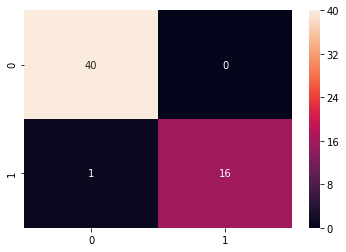

In [114]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')